In [20]:
import pandas as pd

# Load the data from the same directory
metadata_df = pd.read_csv('metadata.tsv', sep='\t')

# Display the dataframe with updated styling and using the recommended method to hide the index
styled_df = metadata_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('color', 'black'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#ddd')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', '#eee')]},
]).set_properties(**{'border': '1px solid black'}).hide(axis='index')

styled_df

Dataset,Sample,Subject,Study.Group,Age,Age.Units,Gender,BMI,DOI,Publication.Name,Surgery_Type,Reconstruction,SmokingStatus,Drinking Status,AlcoholConsumption,complication,Glucose,Total_Cholesterol,High blood pressure,Cholesterol,DiabetesMed,Gout...22,Gastric acid medication,Analgesic,Anticoagulant,Others,Lung cancer,Liver cancer,Breast cancer,Uterine cancer,Other cancers,Stroke,Cardiac infarction,Angina,Hypertension,Diabetes,Dyslipidemia,Cataract,Stomach ulcer,Stomach polyps,Duodenal ulcers,Colorectal polyps,Chronic hepatitis and liver cirrhosis,Gallstone,Ureteral or kidney stones,Gout...46,Hip fracture,Arm or wrist fracture,Femur base fractures,Other diseases,Subject.Num,Shared.w.YACHIDA_2019
ERAWIJANTARI_GASTRIC_CANCER_2020,10025.Healthy,10025.Healthy,Healthy,40,Years,Male,25.000000,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,Smoking,Drink,Yes,Healthy,nan,nan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,10025,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10036.Healthy,10036.Healthy,Healthy,64,Years,Female,21.155294,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,NotSmoking,Not Drinking,No,Healthy,94.000000,286.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,10036,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10037.Healthy,10037.Healthy,Healthy,66,Years,Female,25.410900,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,NotSmoking,Drink,Yes,Healthy,110.000000,215.000000,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,10037,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10048.Healthy,10048.Healthy,Healthy,77,Years,Female,23.634033,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,NotSmoking,Drink,No,Healthy,97.000000,246.000000,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,10048,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10058.Healthy,10058.Healthy,Healthy,59,Years,Male,28.841532,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,StoppedSmoking,Drink,Yes,Healthy,121.000000,213.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,10058,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10060.Healthy,10060.Healthy,Healthy,73,Years,Female,20.703125,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,NotSmoking,Not Drinking,No,Healthy,98.000000,212.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,10060,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10064.Gastrectomy,10064.Gastrectomy,Gastrectomy,64,Years,Male,18.818924,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Subtotal Gastrectomy,B-I,StoppedSmoking,Drink,No,Unknown,103.000000,174.000000,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,10064,False
ERAWIJANTARI_GASTRIC_CANCER_2020,10080.Healthy,10080.Healthy,Healthy,74,Years,Male,20.685150,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer treatment on faecal microbiome and metabolome profiles.,Healthy,Healthy,NotSmoking,Drink,No,Healthy,112.000000,218.000000,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,NoYes,No,No,No,10080,True
ERAWIJANTARI_GASTRIC_CANCER_2020,10100.Healthy,10100.Healthy,Healthy,70,Years,Male,23.661439

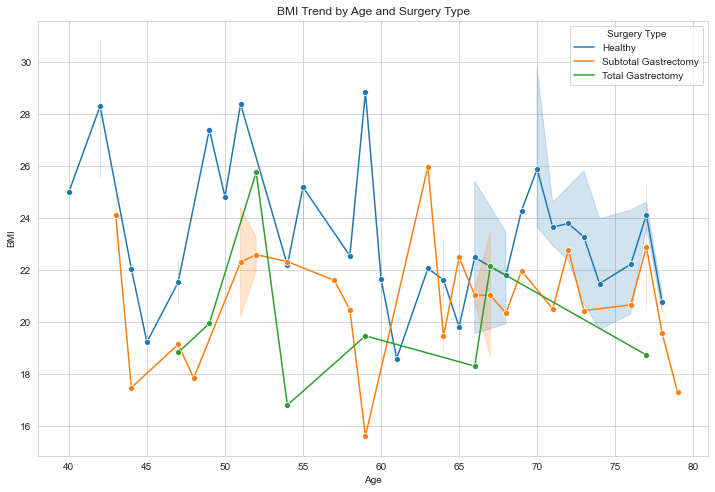

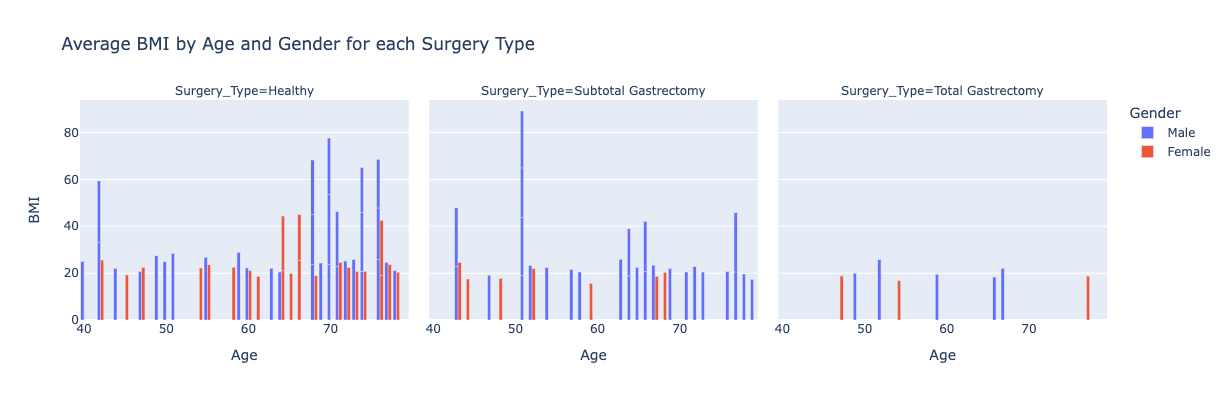

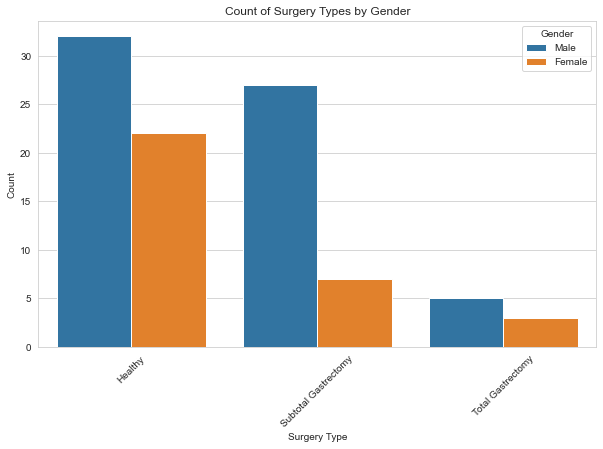

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Heatmap of Correlations: No change here, as the Surgery_Type is categorical and doesn't directly correlate with numerical values.

# Line Chart of BMI Trends by Age for different Surgery Types
# Adjusting the line chart to show BMI trends for different Surgery Types
plt.figure(figsize=(12, 8))
sns.lineplot(data=metadata_df, x='Age', y='BMI', hue='Surgery_Type', marker='o')
plt.title('BMI Trend by Age and Surgery Type')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Surgery Type')
plt.grid(True)
plt.show()

# Bar Graph of Average BMI by Age and Gender for each Surgery Type using Plotly
# This plot now also differentiates by Surgery Type
fig = px.bar(metadata_df, x='Age', y='BMI', color='Gender', facet_col='Surgery_Type', barmode='group',
             height=400, title='Average BMI by Age and Gender for each Surgery Type')
fig.show()

# Assuming a need for a count visualization of Surgery Types across Gender, we can use a simple count plot.
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_df, x='Surgery_Type', hue='Gender')
plt.title('Count of Surgery Types by Gender')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# Note: The line chart and bar graph have been adjusted to consider Surgery Type. The count plot is added
# to visualize the distribution of surgery types across genders, which might offer insights into which
# genders are more likely to undergo certain types of surgery.


Index(['Dataset', 'Sample', 'Subject', 'Study.Group', 'Age', 'Age.Units',
       'Gender', 'BMI', 'DOI', 'Publication.Name', 'Surgery_Type',
       'Reconstruction', 'SmokingStatus', 'Drinking Status',
       'AlcoholConsumption', 'complication', 'Glucose', 'Total_Cholesterol',
       'High blood pressure', 'Cholesterol', 'DiabetesMed', 'Gout...22',
       'Gastric acid medication', 'Analgesic', 'Anticoagulant', 'Others',
       'Lung cancer', 'Liver cancer', 'Breast cancer', 'Uterine cancer',
       'Other cancers', 'Stroke', 'Cardiac infarction', 'Angina',
       'Hypertension', 'Diabetes', 'Dyslipidemia', 'Cataract', 'Stomach ulcer',
       'Stomach polyps', 'Duodenal ulcers', 'Colorectal polyps',
       'Chronic hepatitis and liver cirrhosis', 'Gallstone',
       'Ureteral or kidney stones', 'Gout...46', 'Hip fracture',
       'Arm or wrist fracture', 'Femur base fractures', 'Other diseases',
       'Subject.Num', 'Shared.w.YACHIDA_2019'],
      dtype='object')


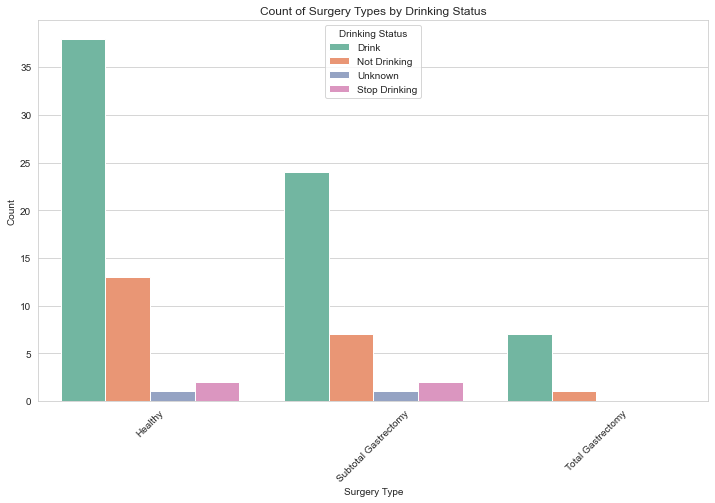

In [31]:
print(metadata_df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Surgery_Type' and 'Drinking_Status' with the actual column names from Step 1
surgery_type_col = 'Surgery_Type'  # Change this to your actual column name for surgery type
drinking_status_col = 'Drinking Status'  # Change this to your actual column name for drinking status

# Proceed with the visualization only if both columns are in the DataFrame
if surgery_type_col in metadata_df.columns and drinking_status_col in metadata_df.columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=metadata_df, x=surgery_type_col, hue=drinking_status_col, palette='Set2')
    plt.title('Count of Surgery Types by Drinking Status')
    plt.xlabel('Surgery Type')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.legend(title='Drinking Status')
    plt.show()
else:
    print("The specified columns do not exist in the DataFrame. Please check the column names.")


In [32]:
import pandas as pd

# Load the dataset
file_path = 'metadata.tsv'  # Adjust the file path if needed
metadata_df = pd.read_csv(file_path, sep='\t')

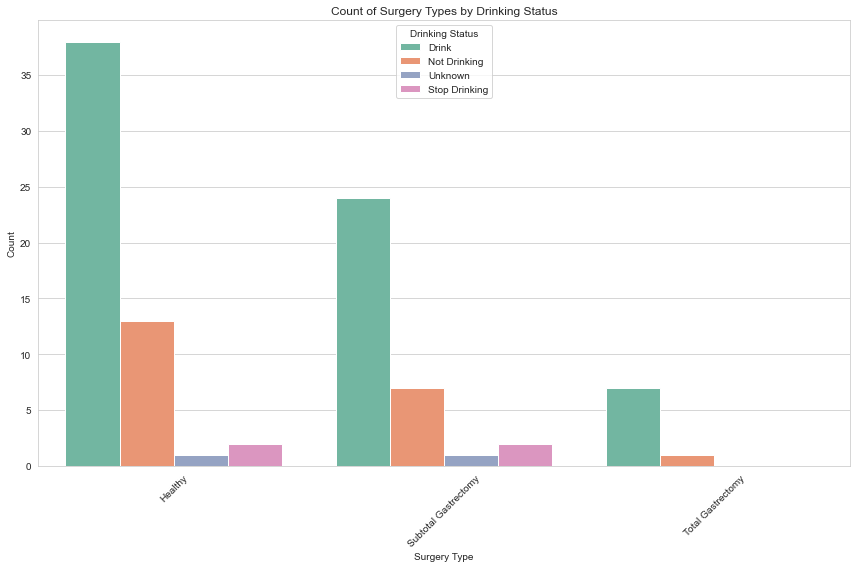

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=metadata_df, x='Surgery_Type', hue='Drinking Status', palette='Set2')
plt.title('Count of Surgery Types by Drinking Status')
plt.xlabel('Surgery Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Drinking Status')
plt.tight_layout()
plt.show()


In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


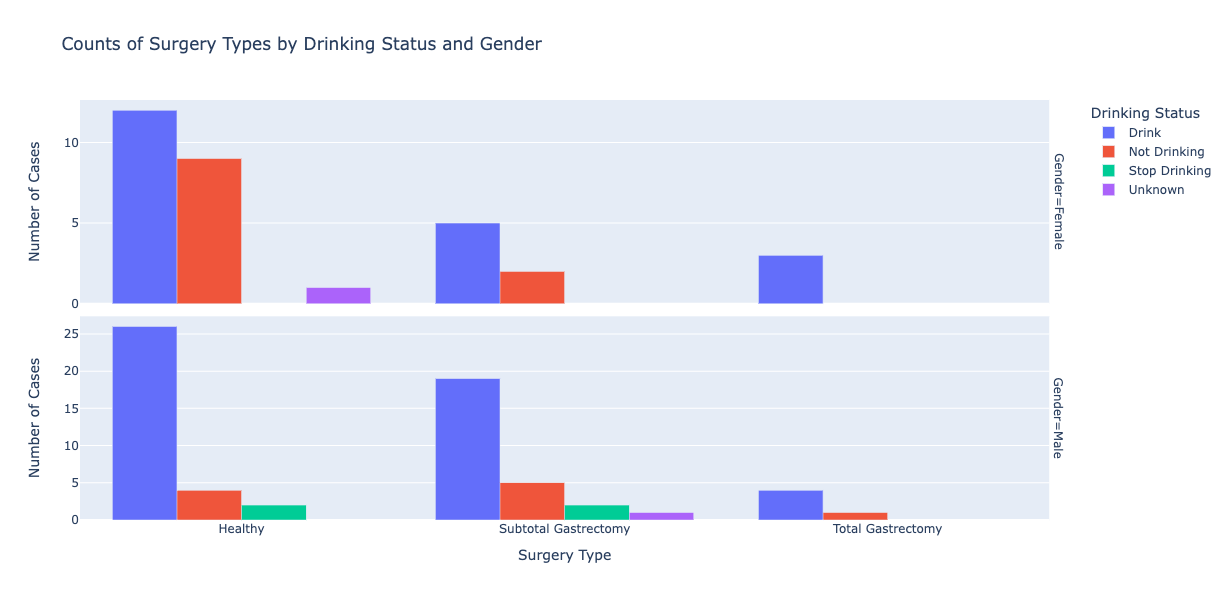

In [38]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'metadata.tsv'  # Adjust the file path if needed
metadata_df = pd.read_csv(file_path, sep='\t')

# Preparing the data: Counting the number of occurrences for each surgery type and drinking status
# This assumes 'Surgery_Type' and 'Drinking_Status' are columns in your DataFrame
counts_df = metadata_df.groupby(['Surgery_Type', 'Drinking Status', 'Gender']).size().reset_index(name='Counts')

# Creating an interactive bar chart with Plotly
fig = px.bar(counts_df, x='Surgery_Type', y='Counts', color='Drinking Status', 
             barmode='group', facet_row='Gender', 
             title='Counts of Surgery Types by Drinking Status and Gender',
             labels={'Counts': 'Number of Cases', 'Surgery_Type': 'Surgery Type', 'Drinking Status': 'Drinking Status'},
             height=600)

# Improve layout
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_yaxes(matches=None)
fig.show()